# MLB PLAYOFF TRENDS
In the past 10 years the MLB have had a whopping 6 teams from the wilcard make it to the world series, with 2 of those years having the championship comprised of no division winners. The NBA and NFL by contrast, have proven to be much more stable, with the NBA having no 5-or-below seeds reach the playoffs except for the recent Mavericks in 2024 and the Heat in 2023. And the only wildcard team from the NFL to make it to the superbowl in the past 10 years is the Tom Brady-led bucs in 2020 during covid (also it's tom brady, so that doesn't really count). 

This anlaysis will try to find trends to explain the volatility that befalls playoff-bound MLB teams that often makes the 162-game season grind irrelevant.

In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
monthsplitsdir = os.listdir('monthsplits_csvfiles')


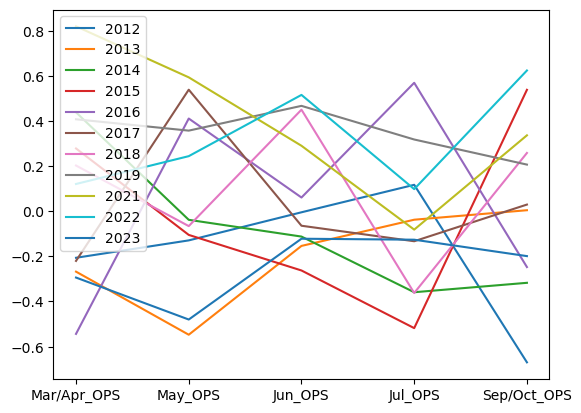

In [8]:
for year in monthsplitsdir:
    monthsplitsdf = pd.read_csv('monthsplits_csvfiles/{}'.format(year))
    corrdf = monthsplitsdf.corr(numeric_only=True)
    stat_to_analyze = 'OPS'
    plt.plot(corrdf.loc[[f'Mar/Apr_{stat_to_analyze}',f'May_{stat_to_analyze}',f'Jun_{stat_to_analyze}',
            f'Jul_{stat_to_analyze}',f'Sep/Oct_{stat_to_analyze}'],[f'Playoff_{stat_to_analyze}']], label='{}'.format(year[:4]))
plt.legend(loc='upper left')
plt.show()

Interestingly, the two years with the lowest correlation, 2014 and 2023, are two years where the world series comprised of 2 wildcard teams, so there's something going on here, lets look further.

In [9]:
#filter dataframe to only get ops columns
monthsplitsdf = pd.read_csv('monthsplits_csvfiles/2014monthsplits.csv')
x_row = []
for col in monthsplitsdf.columns:
    if 'OPS' in col:
        x_row.append(col)
x_row.append(x_row.pop(0))

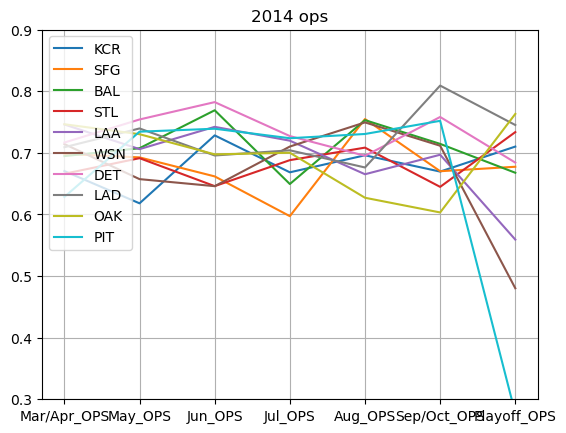

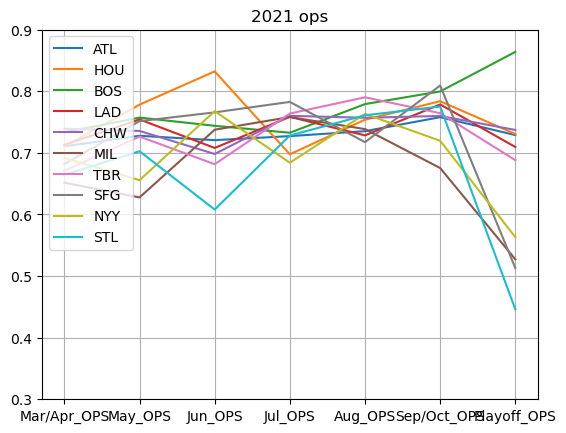

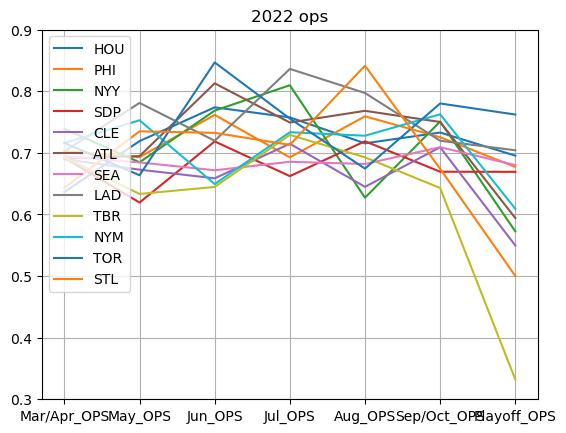

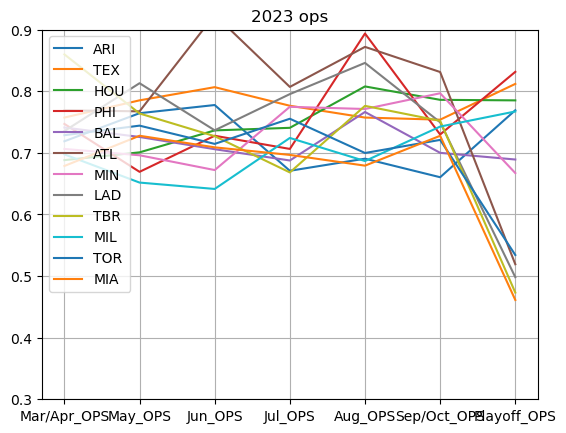

In [20]:
stat_to_analyze = 'OPS'
for year in [2014,2021,2022,2023]:
    monthsplitsdf = pd.read_csv(f'monthsplits_csvfiles/{year}monthsplits.csv')
    ops_df = monthsplitsdf[x_row]
    for x in range(len(monthsplitsdf)):
        plt.plot(ops_df.columns, ops_df.iloc[x], label = f'{monthsplitsdf.iloc[x]['Tm']}')
    plt.ylim(.3,.9)
    plt.legend(loc='upper left')
    plt.title(f'{year} {stat_to_analyze}')
    plt.grid()
    plt.show()

Looking at the wild years of 2014 and 2023 along with more stable years of 2021 and 2022, we see, with a few exceptions, that ops generally falls or stays about the same compared to their regular season averages.

2014 was especially wild, excluding Pittsburgh (one game wildcard can't really be used as an example), the two number one seeds' OPS take a dive in divsional series, where they both won a total of 1 out of 9 games.

Later we can find trends to avoid a collapse in playoff OPS, but for now let's see the fate of those teams whose OPS fall below a measly .600

In [38]:
under600df = pd.DataFrame()
for file in monthsplitsdir:
    monthsplitsdf = pd.read_csv(f'monthsplits_csvfiles/{file}')
    splitdf = monthsplitsdf.loc[monthsplitsdf['Playoff_OPS'] < .600]
    under600df = pd.concat([under600df, splitdf])

under600df

,Tm,Playoff_BA,Playoff_OPS,Playoff_SO,Playoff_AB,Playoff_Series_Count,Playoff_SO/BA,Mar/Apr_BA,Mar/Apr_OPS,Mar/Apr_SO/PA,...,Jul_SO/PA,Jul_LOB,Aug_BA,Aug_OPS,Aug_SO/PA,Aug_LOB,Sep/Oct_BA,Sep/Oct_OPS,Sep/Oct_SO/PA,Sep/Oct_LOB
2,NYY,0.184000,0.549500,83,320,2,0.259375,0.269674,0.809188,0.158439,...,0.204082,6.346154,0.263764,0.754058,0.186679,7.071429,0.262104,0.772453,0.185934,7.354839
4,BAL,0.214500,0.520500,54,215,2,0.251163,0.245627,0.718877,0.203814,...,0.238378,6.222222,0.246625,0.732620,0.193000,6.296296,0.254402,0.763272,0.214575,6.774194
6,OAK,0.194000,0.553000,50,155,1,0.322581,0.205239,0.599096,0.188552,...,0.237844,6.708333,0.252034,0.753499,0.217996,6.464286,0.240187,0.732740,0.248127,6.967742
8,TEX,0.265000,0.570000,6,34,1,0.176471,0.283873,0.811101,0.185144,...,0.156502,7.086957,0.279408,0.781707,0.168165,6.379310,0.248120,0.737299,0.191304,5.967742
1,STL,0.214667,0.599667,124,558,3,0.222222,0.236694,0.651826,0.181818,...,0.164354,7.200000,0.255675,0.706134,0.183036,6.793103,0.255887,0.705333,0.183635,6.555556
7,ATL,0.214000,0.564000,42,131,1,0.320611,0.242796,0.728872,0.250509,...,0.198020,6.923077,0.242892,0.682842,0.227273,7.111111,0.226952,0.654467,0.229675,6.444444
4,LAA,0.170000,0.559000,25,106,1,0.235849,0.250191,0.745874,0.204232,...,0.212264,6.666667,0.242872,0.665092,0.192238,6.827586,0.246140,0.696736,0.207661,6.192308
5,WSN,0.164000,0.480000,39,159,1,0.245283,0.248604,0.714071,0.221304,...,0.202790,7.500000,0.261602,0.749243,0.207240,6.551724,0.254498,0.711375,0.201543,7.481481
9,PIT,0.125000,0.277000,10,32,1,0.312500,0.216971,0.628266,0.214214,...,0.187689,7.346154,0.259659,0.730442,0.194391,6.285714,0.264076,0.751800,0.204000,7.615385
6,TEX,0.217000,0.559000,39,184,1,0.211957,0.204485,0.592155,0.189591,...,0.189901,6.958333,0.268658,0.734090,0.172911,6.571429,0.253657,0.756146,0.191693,7.531250


Not surprisingly, no team under a .600 playoff OPS makes it to the world series (no playoff series count is above 2)

In [40]:
playoff_series_count_list = under600df['Playoff_Series_Count']
no_win_count = 0
one_win_count = 0
for count in playoff_series_count_list:
    if count == 1:
        no_win_count += 1
    elif count == 2:
        one_win_count += 1
print('Number of teams that do not win a series:', no_win_count)
print('Number of teams that win a series:', one_win_count)
print('Percentage of teams under a .600 playoff OPS that do not win a series', no_win_count / len(under600df))

Number of teams that do not win a series: 30
Number of teams that win a series: 7
Percentage of teams under a .600 playoff OPS that do not win a series 0.7894736842105263


So in closing, no team with a under .600 OPS has made it to the world series, and teams with such an OPS have an almost 80% chance of going home without advancing.

More analysis to come to try to find why hitters collaps in the playoffs, is it pressure? Pitching magically gets better? Sample size too small? We'll see.